# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import statistics

In [22]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression


# 2. Collect and load data

In [3]:
df=pd.read_csv('bigcity.csv')
df['pop_1920']=df['u']
df['pop_1930']=df['x']
df.head()

,Unnamed: 0,u,x,pop_1920,pop_1930
0,1,138,143,138,143
1,2,93,104,93,104
2,3,61,69,61,69
3,4,179,260,179,260
4,5,48,75,48,75


In [4]:
df_new=df[['pop_1920','pop_1930']]
df_new.head()

,pop_1920,pop_1930
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# 3. Explore numeric variables - five number summary

In [5]:
df_new.describe()

,pop_1920,pop_1930
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

<AxesSubplot:xlabel='pop_1930'>

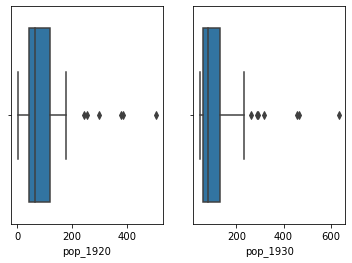

In [6]:
plt.subplot(1, 2, 1)
sns.boxplot(df_new['pop_1920'])
plt.subplot(1, 2, 2)
sns.boxplot(df_new['pop_1930'])

In [19]:
np.var(df_new)

pop_1920    10677.959184
pop_1930    14849.468555
dtype: float64

In [24]:
statistics.stdev(df_new['pop_1920'])

104.40506054146354

In [25]:
statistics.stdev(df_new['pop_1930'])

123.12121053252035

<AxesSubplot:xlabel='pop_1930', ylabel='Density'>

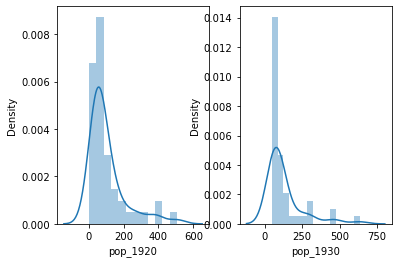

In [15]:
plt.subplot(1, 2, 1)
sns.distplot(df_new['pop_1920'])
#sns.distplot(df_new['pop_1920'])
plt.subplot(1, 2, 2)
sns.distplot(df_new['pop_1930'])


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

<AxesSubplot:xlabel='pop_1920', ylabel='pop_1930'>

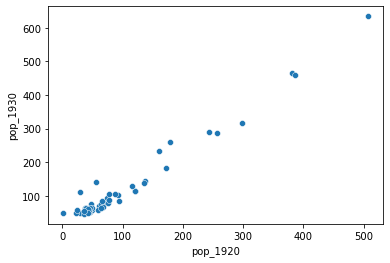

In [26]:
sns.scatterplot(df['pop_1920'],df['pop_1930'])

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [11]:
X=df_new['pop_1920']
y=df_new['pop_1930']
X.shape,y.shape

((49,), (49,))

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [13]:
df_new.isnull().sum()

pop_1920    0
pop_1930    0
dtype: int64

In [14]:
df_new.corr()

,pop_1920,pop_1930
pop_1920,1.000000,0.981742
pop_1930,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new['pop_1920'], df_new['pop_1930'],random_state=1, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39,)
(10,)
(39,)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [33]:
X=np.array(df_new['pop_1920']).reshape(-1,1)
y=np.array(df_new['pop_1930']).reshape(-1,1)

lr=LinearRegression()
lr.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
lr.score(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
print('m:',lr.coef_)
print('c:',lr.intercept_)
y=1.159x+9.718

m: [[1.15945123]]
c: [9.71845532]


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

<AxesSubplot:xlabel='pop_1920', ylabel='pop_1930'>

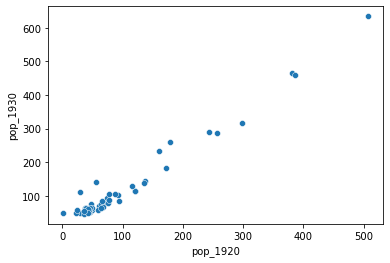

In [32]:
import seaborn as sns
sns.scatterplot(df_new['pop_1920'],df_new['pop_1930'])

In [47]:
X=np.array(df_new['pop_1920']).reshape(-1,1)
y=np.array(df_new['pop_1930']).reshape(-1,1)
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
model1.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1252.
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.57e-35
Time:                        13:17:51   Log-Likelihood:                -223.55
No. Observations:                  49   AIC:                             451.1
Df Residuals:                      47   BIC:                             454.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3840      4.777      1.755      0.086      -1.226      17.994
x1             1.1577      0.033     35.383      0.000       1.092       1.224
==============================================================================
Omnibus:                       12.819   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.429
Skew:                           1.084   Prob(JB):                      0.00121
Kurtosis:                       4.369   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

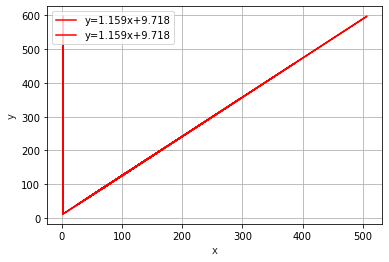

In [51]:


import matplotlib.pyplot as plt
import numpy as np
x = df_new['pop_1920']
y=1.159*(x)+9.718
plt.plot(X, y, '-r', label='y=1.159x+9.718')
#plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()



# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
ypred_train=lr.predict(np.array(X_train).reshape(-1,1))
mse_train=mean_squared_error(y_train,ypred_train)
ypred_test=lr.predict(np.array(X_test).reshape(-1,1))
mse_test=mean_squared_error(y_test,ypred_test)
r_2_train=lr.score(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
r_2_test=lr.score(np.array(X_test).reshape(-1,1),np.array(y_test).reshape(-1,1))

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [60]:
r_2_train=lr.score(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
r_2_test=lr.score(np.array(X_test).reshape(-1,1),np.array(y_test).reshape(-1,1))